In [2]:
# import the necessary libraries
import nltk
import json
import pandas
from datetime import datetime
import plotly.express as px

In [3]:
natalismPosts = pandas.read_json('/Volumes/scratch/hpc/r_natalism_posts.jsonl', lines=True)


natalismComments = pandas.read_json('/Volumes/scratch/hpc/r_natalism_comments.jsonl', lines=True)




In [4]:

natalismComments.head()


,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,top_awarded_type,comment_type,collapsed_reason_code,retrieved_utc,author_is_blocked,unrepliable_reason,editable,_meta,created,body_sha1
0,1.0,[deleted],NaN,NaN,[deleted],0,1354486215,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,SammyD1st,NaN,NaN,Whoops... didn't mean for that to be a self po...,0,1354487261,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,SammyD1st,NaN,NaN,I thought this was funny.,0,1354488213,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Jest2,NaN,NaN,I gathered it was a debate on the morality of ...,0,1354916271,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,SammyD1st,NaN,NaN,"Yup, I agree.\n\nWith some bonus jive-talking.",0,1354985956,None,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
natalismPosts.head()


,author,author_flair_css_class,author_flair_text,banned_by,created_utc,distinguished,domain,downs,edited,gilded,...,top_awarded_type,url_overridden_by_dest,gallery_data,is_gallery,author_cakeday,poll_data,call_to_action,author_is_blocked,_meta,previous_selftext
0,SammyD1st,None,None,NaN,1354485197,None,self.Natalism,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SammyD1st,None,None,NaN,1354485313,None,nytimes.com,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[deleted],None,None,NaN,1354485677,None,self.Natalism,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[deleted],None,None,NaN,1354485909,None,self.Natalism,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[deleted],None,None,NaN,1354486320,None,self.Natalism,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
natalismPosts['created_utc'] 


0       1354485197
1       1354485313
2       1354485677
3       1354485909
4       1354486320
           ...    
8338    1762379964
8339    1762393143
8340    1762397236
8341    1762449560
8342    1762491838
Name: created_utc, Length: 8343, dtype: int64

In [7]:
## Dates and Times refactoring
### add full dates and times to the data frame
natalismPosts["created_utc_datetime_full"] = pandas.to_datetime(natalismPosts['created_utc'], unit='s', origin='unix', utc=True)
natalismComments["created_utc_datetime_full"] = pandas.to_datetime(natalismComments['created_utc'], unit='s', origin='unix', utc=True)

### add time only to the data frame
natalismPosts["created_utc_datetime_times"] = pandas.to_datetime(natalismPosts['created_utc'], unit='s', origin='unix', utc=True).dt.time
natalismComments["created_utc_datetime_times"] = pandas.to_datetime(natalismComments['created_utc'], unit='s', origin='unix', utc=True).dt.time


### add dates only to the data frame
natalismPosts["created_utc_datetime_dates"] = pandas.to_datetime(natalismPosts['created_utc'], unit='s', origin='unix', utc=True).dt.date
natalismComments["created_utc_datetime_dates"] = pandas.to_datetime(natalismComments['created_utc'], unit='s', origin='unix', utc=True).dt.date


In [8]:
## post frequency
## We see that the posts happen around the election, and innauguration day of President Trump's second term
natalismPosts["created_utc_datetime_dates"].value_counts().head(20)

created_utc_datetime_dates
2024-07-23    23
2024-05-28    21
2024-07-26    20
2025-01-15    18
2024-12-19    18
2024-04-28    17
2024-07-30    17
2024-07-27    17
2025-01-16    16
2025-01-06    15
2024-12-29    15
2025-01-17    15
2024-04-23    14
2025-01-03    14
2024-09-29    14
2024-09-28    14
2025-01-13    14
2024-08-24    14
2024-07-24    14
2025-01-12    14
Name: count, dtype: int64

In [9]:
## We see very similar patterns in the comments
natalismComments["created_utc_datetime_dates"].value_counts().head(20)

created_utc_datetime_dates
2025-01-15    3448
2025-01-16    2435
2025-01-25    2366
2024-08-21    2271
2024-12-30    2236
2024-07-25    2195
2025-01-11    2165
2024-07-23    2151
2024-07-26    2142
2024-11-19    2133
2025-01-12    1997
2025-01-10    1995
2025-01-13    1951
2025-01-14    1941
2024-07-18    1922
2024-07-27    1831
2025-01-09    1806
2025-01-26    1752
2024-10-04    1671
2025-01-17    1668
Name: count, dtype: int64

<Axes: xlabel='created_utc_datetime_dates'>

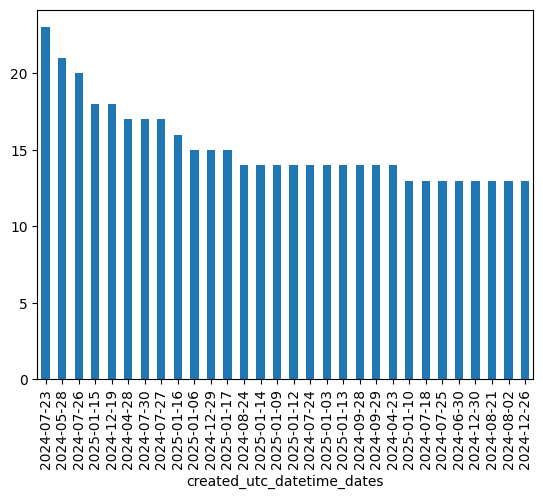

In [10]:
postDatesFreq = natalismPosts["created_utc_datetime_dates"].value_counts()
commentDatesFreq = natalismComments["created_utc_datetime_dates"].value_counts()

#postDatesFreq.plot(kind='bar')
#postDatesFreq.head(30).plot(kind='bar')
postDatesFreq.sort_values(ascending=False).head(30).plot(kind='bar')

<Axes: xlabel='created_utc_datetime_dates'>

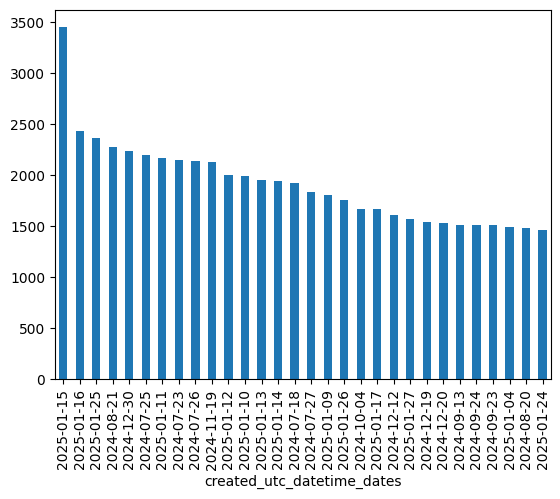

In [11]:
commentDatesFreq.head(30).plot(kind='bar')

In [12]:
## Interactive Plotly visualization for post dates
### Sort by date for chronological view
### Black BG, Red FG, Text, and Lines

postDatesFreq_sorted = natalismPosts["created_utc_datetime_dates"].value_counts().sort_index()

fig = px.bar(
    x=postDatesFreq_sorted.index,
    y=postDatesFreq_sorted.values,
    labels={'x': 'Date', 'y': 'Number of Posts'},
    title='r/Natalism Post Frequency Over Time',
    color_discrete_sequence=['red']
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Posts",
    xaxis=dict(
        rangeslider=dict(visible=True),  # Adds a range slider for easy navigation
        type="date"
    ),
    hovermode="x unified",
    font_color="red",
    paper_bgcolor="black",
    plot_bgcolor="black"
)

fig.update_traces(
    hovertemplate="Date: %{x}<br>Posts: %{y}<extra></extra>"
)

fig.show()


In [13]:
## Interactive Plotly visualization for comment dates
### Sort by date for chronological view
### Black BG, Red FG, Text, and Lines

commentDatesFreq_sorted = natalismComments["created_utc_datetime_dates"].value_counts().sort_index()

fig = px.bar(
    x=commentDatesFreq_sorted.index,
    y=commentDatesFreq_sorted.values,
    labels={'x': 'Date', 'y': 'Number of Comments'},
    title='r/Natalism Comment Frequency Over Time',
    color_discrete_sequence=['red']
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Comments",
    xaxis=dict(
        rangeslider=dict(visible=True),  # Adds a range slider for easy navigation
        type="date"
    ),
    hovermode="x unified",
    font_color="red",
    paper_bgcolor="black",
    plot_bgcolor="black"
)

fig.update_traces(
    hovertemplate="Date: %{x}<br>Comments: %{y}<extra></extra>"
)

fig.show()


In [14]:
## User with most posts

natalismPosts['author'].value_counts().head(10)




author
SammyD1st           1937
dissolutewastrel     703
[deleted]            685
Salami_Slicer        134
DaphneDK42           113
Dan_Ben646            76
userforums            73
CMVB                  63
bioideology           62
Monkey_Paralysed      62
Name: count, dtype: int64

In [15]:
## User with most comments

natalismComments['author'].value_counts().head(10)


author
[deleted]            6941
CMVB                 3069
SammyD1st            2755
BO978051156          2034
Visible_whisperer    1649
Dan_Ben646           1440
Ok-Hunt7450          1051
goyafrau              998
Sapiescent            838
NoMoreNicksLeft       788
Name: count, dtype: int64

In [16]:
## Drop deleted users

natalismPosts_removed_deleted = natalismPosts[natalismPosts['author'] != '[deleted]']
natalismComments_removed_deleted = natalismComments[natalismComments['author'] != '[deleted]']




In [17]:
natalismPosts_removed_deleted['author'].value_counts().head(10)


author
SammyD1st           1937
dissolutewastrel     703
Salami_Slicer        134
DaphneDK42           113
Dan_Ben646            76
userforums            73
CMVB                  63
Monkey_Paralysed      62
OppositeRock4217      62
bioideology           62
Name: count, dtype: int64

In [18]:
natalismComments_removed_deleted['author'].value_counts().head(10)

author
CMVB                    3069
SammyD1st               2755
BO978051156             2034
Visible_whisperer       1649
Dan_Ben646              1440
Ok-Hunt7450             1051
goyafrau                 998
Sapiescent               838
NoMoreNicksLeft          788
NearbyTechnology8444     757
Name: count, dtype: int64

In [19]:
post_counts_by_user = natalismPosts_removed_deleted['author'].value_counts().sort_index()

fig = px.bar(
    x=post_counts_by_user.index,
    y=post_counts_by_user.values,
    labels={'x': 'User', 'y': 'Number of Posts'},
    title='r/Natalism Top Posters (Excluding Deleted Users)',
    color_discrete_sequence=['red']
)

fig.update_layout(
    xaxis_title="User",
    yaxis_title="Number of Posts",
    xaxis=dict(
        tickangle=45  # Angle labels for readability
    ),
    hovermode="x unified",
    font_color="red",
    paper_bgcolor="black",
    plot_bgcolor="black"
)

fig.update_traces(
    hovertemplate="User: %{x}<br>Posts: %{y}<extra></extra>"
)

fig.show()


In [20]:
# Interactive Plotly bar graph for comments per user
# Using natalismComments_removed_deleted (excludes [deleted] users)

comment_counts_by_user = natalismComments_removed_deleted['author'].value_counts().sort_index()

fig = px.bar(
    x=comment_counts_by_user.index,
    y=comment_counts_by_user.values,
    labels={'x': 'User', 'y': 'Number of Comments'},
    title='r/Natalism Top Commenters (Excluding Deleted Users)',
    color_discrete_sequence=['red']
)

fig.update_layout(
    xaxis_title="User",
    yaxis_title="Number of Comments",
    xaxis=dict(
        tickangle=45  # Angle labels for readability
    ),
    hovermode="x unified",
    font_color="red",
    paper_bgcolor="black",
    plot_bgcolor="black"
)

fig.update_traces(
    hovertemplate="User: %{x}<br>Comments: %{y}<extra></extra>"
)

fig.show()


In [21]:
#natalismPosts["title" ].value_counts().head(20).sort_values(ascending=False)

#natalismPosts["title" != "title"]
cleanedTitles = natalismPosts[(natalismPosts['title'] != '[deleted]') & (natalismPosts['title'] != '[deleted by user]') & (natalismPosts['title'] != '[image processing failed]')]

cleanedTitles["title" ].value_counts().head(20).sort_values(ascending=False)

title
Just a joke                                                                                                                                                                6
Where's the lie?                                                                                                                                                           5
Stop being happy                                                                                                                                                           4
FUCK NATALISTS                                                                                                                                                             4
Americans' Preference for Larger Families Highest Since 1971                                                                                                               4
Thoughts on this?                                                                                                                

In [22]:
# Load model directly
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

In [39]:
from transformers import pipeline

sentences = []

for _str in cleanedTitles["title"]:
    sentences.append(_str)
    #print(_str)

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

model_outputs = classifier(sentences)
print(model_outputs[0])


Device set to use mps:0


[{'label': 'neutral', 'score': 0.9653739333152771}, {'label': 'approval', 'score': 0.011827914044260979}, {'label': 'annoyance', 'score': 0.008036813698709011}, {'label': 'realization', 'score': 0.00734848715364933}, {'label': 'disapproval', 'score': 0.003908322658389807}, {'label': 'disappointment', 'score': 0.0032604001462459564}, {'label': 'anger', 'score': 0.0028166319243609905}, {'label': 'confusion', 'score': 0.002732569817453623}, {'label': 'admiration', 'score': 0.0024997531436383724}, {'label': 'amusement', 'score': 0.0023935316130518913}, {'label': 'sadness', 'score': 0.0023719684686511755}, {'label': 'disgust', 'score': 0.0022091474384069443}, {'label': 'optimism', 'score': 0.0018949393415823579}, {'label': 'excitement', 'score': 0.0018837585812434554}, {'label': 'joy', 'score': 0.0015889625065028667}, {'label': 'curiosity', 'score': 0.0015192978316918015}, {'label': 'fear', 'score': 0.0014650262892246246}, {'label': 'surprise', 'score': 0.00115199142601341}, {'label': 'grat

In [41]:
sentiment_task = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest", tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiment_task(sentences)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


[{'label': 'neutral', 'score': 0.819005012512207},
 {'label': 'neutral', 'score': 0.5980987548828125},
 {'label': 'positive', 'score': 0.6829580068588257},
 {'label': 'negative', 'score': 0.95014888048172},
 {'label': 'neutral', 'score': 0.9139797687530518},
 {'label': 'neutral', 'score': 0.8176804184913635},
 {'label': 'positive', 'score': 0.710379958152771},
 {'label': 'neutral', 'score': 0.9118860960006714},
 {'label': 'neutral', 'score': 0.7793083190917969},
 {'label': 'negative', 'score': 0.9337606430053711},
 {'label': 'neutral', 'score': 0.5015403032302856},
 {'label': 'neutral', 'score': 0.7715938091278076},
 {'label': 'neutral', 'score': 0.5205304026603699},
 {'label': 'neutral', 'score': 0.936847984790802},
 {'label': 'neutral', 'score': 0.9287437796592712},
 {'label': 'neutral', 'score': 0.621759831905365},
 {'label': 'negative', 'score': 0.6193269491195679},
 {'label': 'neutral', 'score': 0.8845636248588562},
 {'label': 'negative', 'score': 0.7296046018600464},
 {'label': '

In [42]:
from bertopic import BERTopic

/Users/romxero/Documents/code/phd_research_project/.venv/lib/python3.13/site-packages/hdbscan/plots.py:448: SyntaxWarning:

invalid escape sequence '\l'

/Users/romxero/Documents/code/phd_research_project/.venv/lib/python3.13/site-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning:

invalid escape sequence '\{'



In [43]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(sentences)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [44]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2645,-1_the_of_and_to,"[the, of, and, to, birth, you, is, in, for, this]",[We need to re-normalize getting married and s...
1,0,456,0_fertility_rate_rates_us,"[fertility, rate, rates, us, low, total, in, s...",[Fertility Rates and Population Decline: No Ti...
2,1,299,1_natalism_natalist_pronatalist_natalists,"[natalism, natalist, pronatalist, natalists, w...","[What is Natalism?, Zeno's Natalism., Zeno's N..."
3,2,226,2_kids_having_want_dont,"[kids, having, want, dont, have, children, peo...","[Why aren’t people having children?, why I'm n..."
4,3,219,3_japan_japans_japanese_population,"[japan, japans, japanese, population, record, ...",[x Number of children in Japan falls for 37th ...
...,...,...,...,...,...
145,144,11,144_normal_thought_cute_normalize,"[normal, thought, cute, normalize, pure, belon...","[this is normal, Thought it was cute, wanted t..."
146,145,11,145_lie_wheres_bible_tho,"[lie, wheres, bible, tho, lied, lying, aint, w...","[Where’s the lie?, Where's the lie?, Where's t..."
147,146,10,146_trolls_tired_banned_ban,"[trolls, tired, banned, ban, yikes, apparent, ...","[Never joined this sub, tired of seeing, and I..."
148,147,10,147_discussion_pathetically_disallow_separate,"[discussion, pathetically, disallow, separate,...",[It's pathetically weak to disallow dissenting...


In [45]:
topic_model.get_topic(0)

[('fertility', np.float64(0.04191643521038922)),
 ('rate', np.float64(0.015764425610177966)),
 ('rates', np.float64(0.014085753219405294)),
 ('us', np.float64(0.011525520756027629)),
 ('low', np.float64(0.010640441407061819)),
 ('total', np.float64(0.009663790106408228)),
 ('in', np.float64(0.009170601887303126)),
 ('states', np.float64(0.009020432026255501)),
 ('americas', np.float64(0.008963026616490483)),
 ('decline', np.float64(0.008732454835965188))]

In [46]:
natalismComments["body"].head(10)

0                                            [deleted]
1    Whoops... didn't mean for that to be a self po...
2                            I thought this was funny.
3    I gathered it was a debate on the morality of ...
4       Yup, I agree.\n\nWith some bonus jive-talking.
5    gfgdhfgfnfghfbvbgjjffbfhghdjhrgfrhrgfrhfrghfrc...
6    This is a wonderful journal, that includes bot...
7    I don't think pro-natalist necessarily means p...
8    This is the Professor's draft version.\n\nThe ...
9    This is a really good one, I may have to post ...
Name: body, dtype: object

In [47]:
cleanedCommentBodies = natalismComments[(natalismComments['body'] != '[deleted]') & (natalismComments['body'] != '[deleted by user]') & (natalismComments['body'] != '[image processing failed]')]


In [49]:
cleanedCommentBodies["body"].head(10)

1     Whoops... didn't mean for that to be a self po...
2                             I thought this was funny.
3     I gathered it was a debate on the morality of ...
4        Yup, I agree.\n\nWith some bonus jive-talking.
5     gfgdhfgfnfghfbvbgjjffbfhghdjhrgfrhrgfrhfrghfrc...
6     This is a wonderful journal, that includes bot...
7     I don't think pro-natalist necessarily means p...
8     This is the Professor's draft version.\n\nThe ...
9     This is a really good one, I may have to post ...
10    I posted this because the comments include som...
Name: body, dtype: object

In [51]:
cleanedCommentCorpusList = []
for _str in cleanedCommentBodies["body"]:
    cleanedCommentCorpusList.append(_str)

cleanedCommentTopicModel = BERTopic()
topics, probs = cleanedCommentTopicModel.fit_transform(cleanedCommentCorpusList)

In [52]:
cleanedCommentTopicModel.get_topic_info()
#cleanedCommentTopicModel.get_topic(0)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,161512,-1_and_to_life_my,"[and, to, life, my, we, kids, have, that, chil...",[The decline in birth rates is largely due to ...
1,0,2888,0_removed_leaving_here_no,"[removed, leaving, here, no, this, , , , , ]","[[removed], [removed], [removed]]"
2,1,1894,1_israel_jews_israeli_jewish,"[israel, jews, israeli, jewish, orthodox, secu...",[Israel is complex country. There's essentiall...
3,2,1578,2_control_contraception_contraceptives_pill,"[control, contraception, contraceptives, pill,...",[Birth control has been around for about as lo...
4,3,1530,3_poor_afford_poverty_rich,"[poor, afford, poverty, rich, money, kids, wea...",[This is how it was for us. Poor people have a...
...,...,...,...,...,...
1963,1962,10,1962_lawyers_afluenza_restitution_timethey,"[lawyers, afluenza, restitution, timethey, ism...","[Right, so not lawyers. Thanks., And I couldn'..."
1964,1963,10,1963_barking_mothers_surgeons_momma,"[barking, mothers, surgeons, momma, elevate, b...",[We need to support working mothers and Change...
1965,1964,10,1964_lingual_bmws_millionyear_60kyear,"[lingual, bmws, millionyear, 60kyear, 247365, ...",[Raising a kid is not actually that expensive....
1966,1965,10,1965_bans_ban_armageddon_swiftly,"[bans, ban, armageddon, swiftly, selfintereste...",[I think whoever proposed those bans and anyon...


In [59]:
cleanedCommentTopicModel.get_topic(1)

[('israel', np.float64(0.01859701396281387)),
 ('jews', np.float64(0.012723347068208732)),
 ('israeli', np.float64(0.009349995639965433)),
 ('jewish', np.float64(0.008186345659287051)),
 ('orthodox', np.float64(0.007860966933068545)),
 ('secular', np.float64(0.006712339693714224)),
 ('israelis', np.float64(0.005853014328822512)),
 ('hamas', np.float64(0.005272235481469697)),
 ('gaza', np.float64(0.004926998601011599)),
 ('palestinians', np.float64(0.004124024809415222))]